In [41]:
import pandas as pd
import scipy 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns 
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

In [16]:
data= pd.read_csv("elon_tweets.csv", sep=';')
data

,Unnamed: 0,tweet_id,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
0,0,1575581872913907712,2022-09-29,20:22:46,Twitter for iPhone,en,@MuskUniversity True,MuskUniversity,377,127,3007,107414837,122,neutral,0.600531
1,1,1575509494510993408,2022-09-29,15:35:09,Twitter for iPhone,en,Needs be able to get from Starbase to South Pa...,_,1604,1416,33556,107414837,122,neutral,0.845257
2,2,1575508878300618752,2022-09-29,15:32:42,Twitter for iPhone,en,@WholeMarsBlog Off-label use 🤣,WholeMarsBlog,754,492,23482,107414837,122,neutral,0.753030
3,3,1575508498430820352,2022-09-29,15:31:12,Twitter for iPhone,en,Cybertruck will be waterproof enough to serve ...,_,12870,9732,124276,107414837,122,positive,0.611826
4,4,1575507735298207744,2022-09-29,15:28:10,Twitter for iPhone,en,@phibetakitten Submarines use electric motors ...,phibetakitten,509,347,8189,107414837,122,neutral,0.859709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18330,18330,1586057952678465537,2022-10-28,18:10:58,Twitter for iPhone,qam,@slashdot !,slashdot,1548,1611,31787,115238579,130,neutral,0.628496
18331,18331,1586057687782998017,2022-10-28,18:09:54,Twitter for iPhone,en,@skorusARK Cool!,skorusARK,1041,593,21339,115238579,130,positive,0.932170
18332,18332,1585981766229143552,2022-10-28,13:08:13,Twitter for iPhone,en,@WeAreCanProud First I’ve heard,WeAreCanProud,3213,3846,77864,115238579,130,neutral,0.758104
18333,18333,1585966869122457600,2022-10-28,12:09:02,Twitter for iPhone,en,🎶 let the good times roll 🎶,_,48131,94751,999337,115238579,130,positive,0.886272


In [17]:
data.drop(columns='Unnamed: 0', inplace=True)

In [18]:
data.set_index('tweet_id', inplace=True)

In [26]:
data.sort_values('date', ascending=False)

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
tweet_id,,,,,,,,,,,,,
1590519242805641216,2022-11-10,01:38:32,Twitter for iPhone,en,"@micsolana In days to come, we’ll add granular...",micsolana,348,133,1557,115241851,130,neutral,0.730545
1590505894210834434,2022-11-10,00:45:30,Twitter for iPhone,en,@micsolana We are changing the text to say “Le...,micsolana,1224,598,9464,115241851,130,neutral,0.587615
1590391902662455296,2022-11-09,17:12:32,Twitter for iPhone,en,@SciGuySpace Finally,SciGuySpace,464,275,7223,115241851,130,neutral,0.496665
1590398147968520192,2022-11-09,17:37:21,Twitter for iPhone,en,@lawrencekitema @SpaceNews_Inc Congratulations!,"lawrencekitema,SpaceNews_Inc",178,167,3831,115241851,130,positive,0.981080
1590392135395979265,2022-11-09,17:13:27,Twitter for iPhone,en,@SpaceNews_Inc Rockets that aren’t reusable ha...,SpaceNews_Inc,1756,1274,22648,115241851,130,negative,0.676390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142881284019060736,2011-12-03,08:22:07,Twitter for iPhone,en,That was a total non sequitur btw,_,27,9,50,107415763,122,negative,0.506732
142880871391838208,2011-12-03,08:20:28,Twitter for iPhone,en,"Great Voltaire quote, arguably better than Twa...",_,23,29,50,107415763,122,positive,0.558608
142179928203460608,2011-12-01,09:55:11,Twitter Web Client,en,Went to Iceland on Sat to ride bumper cars on ...,_,33,22,189,107415714,122,positive,0.973320


In [23]:
corr_num=data.corr()
corr_num

,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_val
reply_count,1.000000,0.731378,0.812238,0.184486,0.180346,-0.010279
retweet_count,0.731378,1.000000,0.920335,0.084760,0.090934,-0.017313
like_count,0.812238,0.920335,1.000000,0.134076,0.142448,-0.018899
follower_count,0.184486,0.084760,0.134076,1.000000,0.889305,-0.041047
friends_count,0.180346,0.090934,0.142448,0.889305,1.000000,-0.031335
sentiment_val,-0.010279,-0.017313,-0.018899,-0.041047,-0.031335,1.000000


<Axes: >

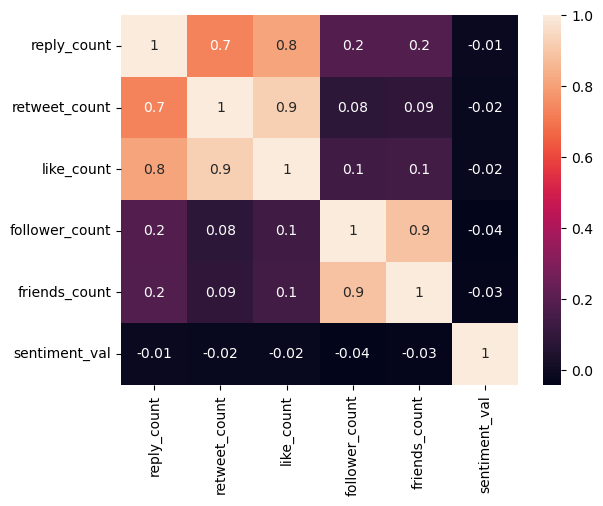

In [24]:
sns.heatmap(corr_num, annot=True, fmt='.1g',)

In [35]:
b=pd.DataFrame(data['date'].value_counts()).reset_index()
b.columns=["date", "tweet_count"]
bc= b.sort_values("date")
bc

,date,tweet_count
2198,2010-06-04,1
1742,2011-12-01,2
1786,2011-12-03,2
2201,2011-12-04,1
968,2011-12-21,7
...,...,...
1144,2022-11-06,6
20,2022-11-07,35
158,2022-11-08,20
148,2022-11-09,20


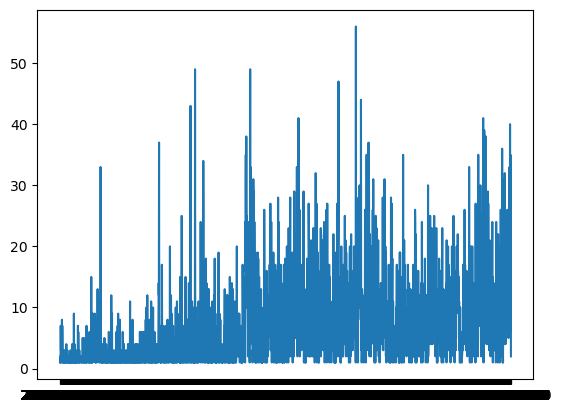

In [51]:
#plt.plot(x=bc['date'], y = bc["tweet_count"])
plt.plot(bc['date'],bc["tweet_count"])
plt.xlabel="Date"
plt.ylabel="Number of tweets"
plt.show()

ValueError: x and y must have same first dimension, but have shapes (18335,) and (2569,)

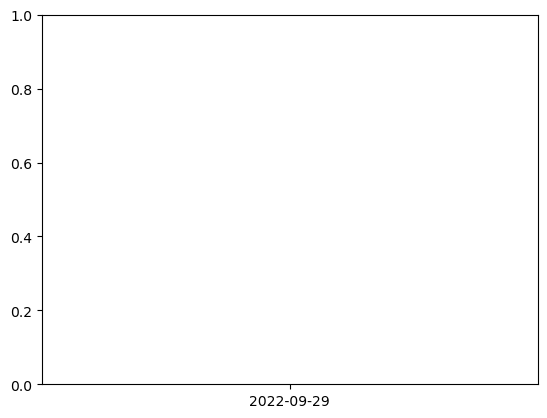